In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
np.random.seed(123)

# Zhu and Ling 2015

## Following Equations 3.5:

In [13]:
def Y(r,v,h,epst):
    return r + v*h**0.5 - 0.5* h + epst
def h(omega,alpha,beta,ht,epst):
    return omega + alpha*(epst)**2 + beta*ht
#def htalt(a,v,h):
#    return a**2 * (1- np.exp((v*h**0.5 - 0.5 * h - (a*h)**0.5)/a))
def eps(a,b,h):
    return np.random.gamma(a, b, 1)[0]  - (a*h)**0.5
def b(v,h,a):
    return 1/((1- np.exp((v*h**0.5 - 0.5 * h - (a*h)**0.5)/a)))

In [17]:
omega = 0.00003577
alpha = 0.155966
beta = 0.646049
v = 0.04873824 # lambda
r = 0.001 # risk free rate r
ht = 1.4 # starting value for variance
a = 1 # shape parameter for gamma distribution
print ("{:<6} {:<6} {:<6} {:<6}".format('bt','Xt','ht', "Yt"))

myb = []
myeps = []
myh = []
myY = []

for i in range(50):
    bt = b(v,ht,a)
    epst = eps(a,bt,ht)
    ht = h(omega,alpha,beta,ht,epst)
    #ht = htalt(a,v,ht)
    Yt = Y(r,v,ht,epst)
    print ("{:<6.4f} {:<6.4f} {:<6.4f} {:<6.4f}".format( bt, epst, ht, Yt))
    myb.append(bt), myeps.append(epst), myh.append(ht), myY.append(Yt) 
    

bt     Xt     ht     Yt    
1.1921 -1.0300 1.0700 -1.5135
1.2803 1.2070 0.9185 0.7955
1.3403 0.2800 0.6057 0.0161
1.5440 0.4379 0.4212 0.2599
1.7760 0.0964 0.2736 -0.0139
2.1288 0.2488 0.1865 0.1776
2.5260 0.9312 0.2557 0.8290
2.1926 2.0016 0.7901 1.6508
1.4069 2.0418 1.1607 1.5150
1.2513 -0.1836 0.7552 -0.5179
1.4284 0.7117 0.5669 0.4659
1.5823 0.6422 0.4306 0.4599
1.7603 1.0699 0.4568 0.8755
1.7194 1.2550 0.5408 1.0215
1.6106 2.2399 1.1319 1.7268
1.2601 -0.9545 0.8734 -1.3446
1.3617 1.0298 0.7297 0.7076
1.4452 -0.4506 0.5031 -0.6666
1.6557 -0.3518 0.3444 -0.4944
1.9294 1.0526 0.3953 0.8866
1.8223 -0.4454 0.2864 -0.5615
2.0871 3.9849 2.6617 2.7346
1.0593 -0.5861 1.7732 -1.4068
1.1313 0.1224 1.1480 -0.3983
1.2551 -1.0510 0.9140 -1.4604
1.3423 0.2554 0.6007 -0.0062
1.5487 0.4852 0.4248 0.3055
1.7699 -0.3454 0.2931 -0.4645
2.0664 -0.1981 0.1955 -0.2733
2.4722 2.4977 1.0993 2.0001
1.2704 -0.5608 0.7593 -0.8970
1.4258 0.8075 0.5923 0.5499
1.5567 0.4887 0.4199 0.3113
1.7781 0.2278 0.2794 0.

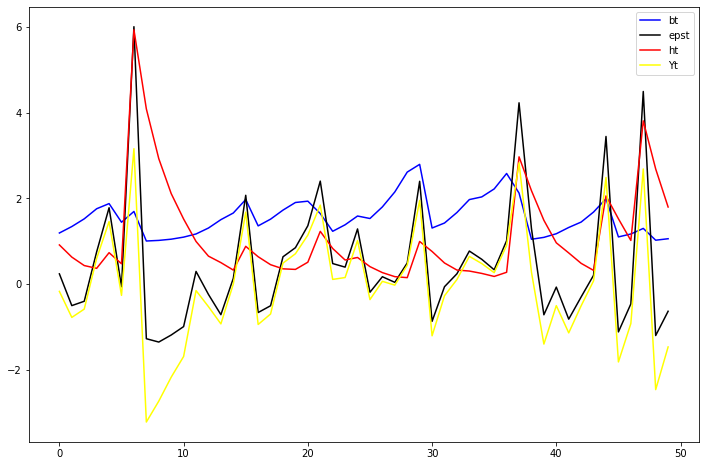

In [15]:
plt.figure(figsize = (12,8))
plt.subplot(111)
plt.plot(myb, color = "blue", label = "bt")
plt.plot(myeps, color = "black", label = "epst")
plt.plot(myh, color = "red", label = "ht")
plt.plot(myY, color = "yellow", label = "Yt")
#plt.plot([0,0],[0,25])
plt.legend()

In [16]:
np.mean(myY)

-0.027938129524750673